In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras import optimizers
import pydot
import pickle
import time

In [9]:
# import data

NAME = "Bangla_Hand_Sign_Char_{}".format(int(time.time()))

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255

print(NAME)

Bangla_Hand_Sign_Char_1601194630


In [11]:
# The CNN Netowrk
model = Sequential()

model.add(Conv2D(16, (2,2), input_shape=(128, 128, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(36, activation='softmax'))
sgd = optimizers.SGD(lr=1e-2)

tensorboard = TensorBoard(log_dir="logs\{}".format(NAME))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(X, y,
          batch_size=16,
          epochs=200,
          validation_split=0.25,
          callbacks=[tensorboard])

# filepath="cnn_model_keras2.h5"
# checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint1]

Train on 753 samples, validate on 252 samples
Epoch 1/200
753/753 [==============================] - 5s 7ms/sample - loss: 3.5889 - acc: 0.0239 - val_loss: 3.5862 - val_acc: 0.0238
Epoch 2/200
753/753 [==============================] - 9s 12ms/sample - loss: 3.5839 - acc: 0.0252 - val_loss: 3.5846 - val_acc: 0.0278
Epoch 3/200
753/753 [==============================] - 9s 12ms/sample - loss: 3.5834 - acc: 0.0359 - val_loss: 3.5865 - val_acc: 0.0198
Epoch 4/200
753/753 [==============================] - 9s 12ms/sample - loss: 3.5815 - acc: 0.0305 - val_loss: 3.5893 - val_acc: 0.0278
Epoch 5/200
753/753 [==============================] - 9s 12ms/sample - loss: 3.5790 - acc: 0.0385 - val_loss: 3.5915 - val_acc: 0.0317
Epoch 6/200
753/753 [==============================] - 9s 12ms/sample - loss: 3.5783 - acc: 0.0385 - val_loss: 3.5931 - val_acc: 0.0238
Epoch 7/200
753/753 [==============================] - 9s 12ms/sample - loss: 3.5758 - acc: 0.0319 - val_loss: 3.5940 - val_acc: 0.0278
Epo

753/753 [==============================] - 11s 14ms/sample - loss: 0.2006 - acc: 0.9349 - val_loss: 3.3296 - val_acc: 0.4325
Epoch 119/200
753/753 [==============================] - 10s 13ms/sample - loss: 0.1657 - acc: 0.9456 - val_loss: 3.3750 - val_acc: 0.4444
Epoch 120/200
753/753 [==============================] - 10s 13ms/sample - loss: 0.1694 - acc: 0.9456 - val_loss: 8.0698 - val_acc: 0.2738
Epoch 121/200
753/753 [==============================] - 10s 13ms/sample - loss: 0.9323 - acc: 0.8167 - val_loss: 2.9645 - val_acc: 0.4087
Epoch 122/200
753/753 [==============================] - 10s 13ms/sample - loss: 0.2545 - acc: 0.9323 - val_loss: 3.0171 - val_acc: 0.4643
Epoch 123/200
753/753 [==============================] - 10s 13ms/sample - loss: 0.1710 - acc: 0.9442 - val_loss: 3.1547 - val_acc: 0.4405
Epoch 124/200
753/753 [==============================] - 10s 13ms/sample - loss: 0.1403 - acc: 0.9615 - val_loss: 3.4744 - val_acc: 0.4444
Epoch 125/200
753/753 [==================

In [12]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 127, 127, 16)      80        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 62, 62, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 17, 17, 64)        51264     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)             

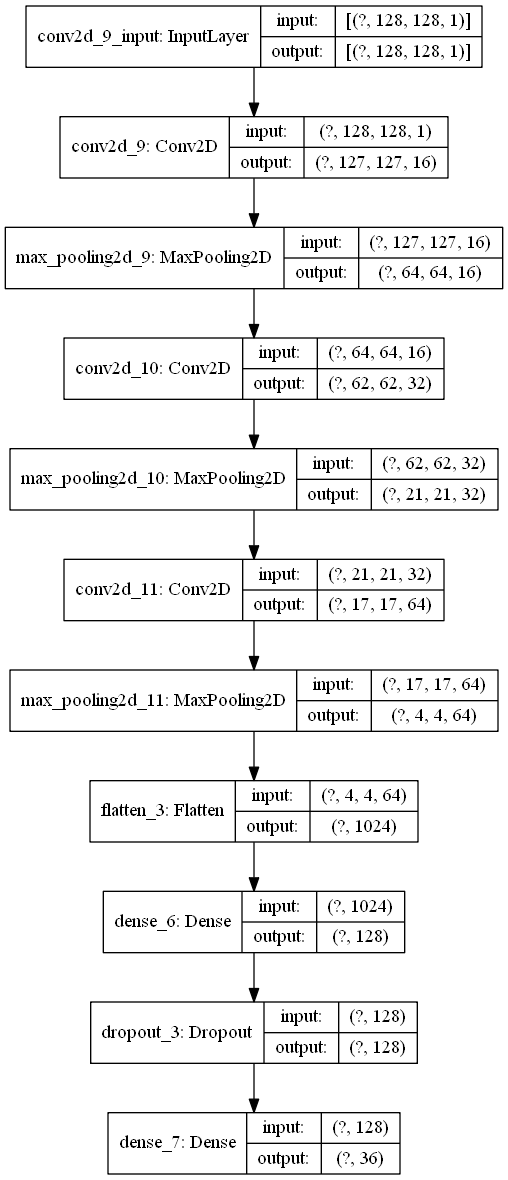

In [13]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_char.png')
Image(retina=True, filename='model_char.png')